In [ ]:
import plotly.express as px
import pandas as pd

def skip_rows(index):
    return index % 20 != 0

# Load your dataset, skipping rows
df2023 = pd.read_csv('2023.prcp.us.csv', header=None, skiprows=lambda x: skip_rows(x))
df2022= pd.read_csv('2022.prcp.us.csv', header=None, skiprows=lambda x: skip_rows(x))
df=pd.concat([df2022,df2023.iloc[:,1:13]],axis=1)
df.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 25)]

# Convert the dataset to long format for easier plotting with Plotly
df_long = df.melt(id_vars=['Latitude', 'Longitude'], var_name='Month', value_name='Precipitation')

# Create the interactive map
fig = px.scatter_geo(df_long,
                     lat='Latitude',
                     lon='Longitude',
                     color='Precipitation',
                     animation_frame='Month',
                     #scope='usa',  # Focus the map on the United States
                     projection="natural earth",
                     title="US 2023 Monthly Precipitation")

fig.update_geos(
    lataxis_range=[24.52, 49.38],  # Latitude range
    lonaxis_range=[-124.77, -66.95]  # Longitude range
)

fig.show()

In [ ]:
import pandas as pd

rangeMag=3
cvtInToMM=25.4 #for inch to mm
def cvtUnit(i):
    #return i*25.4
    return (i-32)/9*5

def clamp300(num):
    t=(num)/rangeMag
    if(t<-1):
        t=-1
    elif(t>1):
        t=1
    return t

def anomalyInd(x):
    if(x<0):
        x*=0.2
    x=abs(x)
    return (x/rangeMag*2)**3


# Load your datasets
# Replace 'your_actual_dataset.csv' and 'your_average_dataset.csv' with the actual file paths
df_actual_2022 = pd.read_csv('2022.prcp.us.csv', header=None, skiprows=lambda x: x % 50 != 0)
df_actual_2023 = pd.read_csv('2023.prcp.us.csv', header=None, skiprows=lambda x: x % 50 != 0)
df_average = pd.read_csv('us_prcp_1901-2000_normal.csv', header=None, skiprows=lambda x: x % 50 != 0)

# Assuming the first two columns are latitude and longitude, and the rest are the monthly values
# Ensure that both DataFrames have the same structure
df_actual_2022.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]
df_actual_2023.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]
df_average.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]

# Calculate the anomaly (actual - average)
df_anomaly_2022 = df_actual_2022.copy()
df_anomaly_2023 = df_actual_2023.copy()
df_anomaly_2022.iloc[:, 2:] = (df_actual_2022.iloc[:, 2:] - cvtUnit(df_average.iloc[:, 2:]))
df_anomaly_2023.iloc[:, 2:] = (df_actual_2023.iloc[:, 2:] - cvtUnit(df_average.iloc[:, 2:]))


monAnomalyIndex=[0 for _ in range(24)]
for rowI in range(0,df_anomaly_2022.shape[0]):
    for colI in range(2,14):  # Starting from the 3rd column
        # Modify the value in the original DataFrame
        # Example modification: multiplying each element by 2
        #print(colI-2)
        monAnomalyIndex[colI-2]+=anomalyInd(df_anomaly_2022.iloc[rowI, colI])
        df_anomaly_2022.iloc[rowI, colI] = clamp300(df_anomaly_2022.iloc[rowI, colI])

for rowI in range(0,df_anomaly_2023.shape[0]):
    for colI in range(2,14):  # Starting from the 3rd column
        # Modify the value in the original DataFrame
        # Example modification: multiplying each element by 2
        #print(colI-2)
        monAnomalyIndex[colI-2+12]+=anomalyInd(df_anomaly_2023.iloc[rowI, colI])
        df_anomaly_2023.iloc[rowI, colI] = clamp300(df_anomaly_2023.iloc[rowI, colI])


df_anomaly_2022.iloc[0,2:]=-1
df_anomaly_2022.iloc[1,2:]=1
# Convert the anomaly dataset to long format for easier plotting with Plotly
df_long_anomaly = df_anomaly_2023.melt(id_vars=['Latitude', 'Longitude'], var_name='Month', value_name='Anomaly')

# Rest of your processing and visualization code...
custom_color_scale = [
    (0.0, "red"),            # Red for the lowest values
    #(0.19, "red"),           # Transition start from red to gray
    (0.3, "lightgray"),      # Light gray at 20th percentile
    (0.4, "gray"),           # Gray in the middle
    (0.6, "gray"),           # Gray in the middle
    (0.7, "lightgray"),      # Light gray at 80th percentile
    #(0.81, "blue"),          # Transition start from gray to blue
    (1.0, "blue")            # Blue for the highest values
]

# Create the interactive map with the custom color scale
figA = px.scatter_geo(df_long_anomaly,
                     lat='Latitude',
                     lon='Longitude',
                     color='Anomaly',
                     animation_frame='Month',
                     projection="natural earth",
                     color_continuous_scale=custom_color_scale,
                     title="US 2023 Monthly Precipitation Anomaly")

figA.update_geos(
    lataxis_range=[24.52, 49.38],  # Latitude range
    lonaxis_range=[-124.77, -66.95]  # Longitude range
)

meanAI=sum(monAnomalyIndex)/12
#monAnomalyIndex=[x-meanAI for x in monAnomalyIndex]
print(monAnomalyIndex)
figA.show()

In [3]:
import pandas as pd
def getAnomalys(actual,df_normal,skip=20,convert_Multiply=1):
    df_actual = pd.read_csv(actual, header=None, skiprows=lambda x: x % skip != 0)
    df_actual.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]
    df_anomaly = df_actual.copy()
    df_anomaly.iloc[:, 2:] = df_actual.iloc[:, 2:] - df_normal.iloc[:, 2:]*convert_Multiply
    return df_anomaly

In [4]:
df_prcp_average = pd.read_csv('us_prcp_1901-2000_normal.csv', header=None, skiprows=lambda x: x % 20 != 0)
df_prcp_average.columns = ['Latitude', 'Longitude'] + [f'Month_{i}' for i in range(1, 13)]
df_anomaly_2022 = getAnomalys('2022.prcp.us.csv',df_prcp_average,convert_Multiply=25.4)
df_anomaly_2023 = getAnomalys('2023.prcp.us.csv',df_prcp_average,convert_Multiply=25.4)

In [5]:
import numpy as np
def to_mat(df_Y0,df_Y1,lat_min=24.52,lat_max=49.38,lon_min=-124.77,lon_max=-66.75,grid=0.2):
    ret=np.zeros(shape=(24,int((lat_max-lat_min)/grid)+1,int((lon_max-lon_min)/grid)+1))
    for _ind,e in df_Y0.iterrows():
        for j in range(1,13):
            ret[j-1][int((e['Latitude']-lat_min)/grid)][int((e['Longitude']-lon_min)/grid)]=max(ret[j-1][int((e['Latitude']-lat_min)/grid)][int((e['Longitude']-lon_min)/grid)],e[1+j])
    for _ind,e in df_Y1.iterrows():
        for j in range(1,13):
            ret[j-1+12][int((e['Latitude']-lat_min)/grid)][int((e['Longitude']-lon_min)/grid)]=max(ret[j-1+12][int((e['Latitude']-lat_min)/grid)][int((e['Longitude']-lon_min)/grid)],e[1+j])
    return ret

In [7]:
from pytrends.request import TrendReq
from datetime import datetime

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["global warming"]

# Set the start date to the beginning of 2023 and the end date to today (or the last date in 2023 you're interested in)
start_date = "2022-01-01"
end_date = "2023-12-31"
#end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date in YYYY-MM-DD format; adjust as needed

# Build the payload with the adjusted timeframe
pytrends.build_payload(kw_list, cat=0, timeframe=f'{start_date} {end_date}', geo='US', gprop='')

# Interest over time
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df)


            global warming  isPartial
date                                 
2022-01-02              38      False
2022-01-09              40      False
2022-01-16              36      False
2022-01-23              45      False
2022-01-30              44      False
...                    ...        ...
2023-12-03              59      False
2023-12-10              55      False
2023-12-17              39      False
2023-12-24              23      False
2023-12-31              30      False

[105 rows x 2 columns]


In [8]:
import pandas as pd
import numpy as np
from datetime import datetime

GTbyMonth = np.zeros(24)
for m in range(1, 13):
    # Generate the start and end date for each month
    start_date = datetime(2022, m, 1)
    end_date = pd.date_range(start_date, periods=1, freq='M').date[0]  # 'M' frequency stands for month end

    # Use the generated start and end dates to filter the DataFrame
    Monthlydf = interest_over_time_df.loc[start_date:end_date]

    # Sum the values for the month and assign to the corresponding position in GTbyMonth
    GTbyMonth[m-1] = int(Monthlydf['global warming'].mean())  # Adjusted index to m-1 since Python is zero-indexed

for m in range(1, 13):
    # Generate the start and end date for each month
    start_date = datetime(2023, m, 1)
    end_date = pd.date_range(start_date, periods=1, freq='M').date[0]  # 'M' frequency stands for month end

    # Use the generated start and end dates to filter the DataFrame
    Monthlydf = interest_over_time_df.loc[start_date:end_date]

    # Sum the values for the month and assign to the corresponding position in GTbyMonth
    GTbyMonth[m-1+12] = int(Monthlydf['global warming'].sum())  # Adjusted index to m-1 since Python is zero-indexed

print(GTbyMonth)


[ 40.  47.  49.  83.  74.  35.  38.  38.  49.  49.  51.  46. 247. 224.
 223. 309. 234. 122. 207. 158. 181. 221. 180. 206.]


C:\Users\KelM\AppData\Local\Temp\ipykernel_45256\3882700227.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\KelM\AppData\Local\Temp\ipykernel_45256\3882700227.py:20: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [9]:
import statsmodels.api as sm
import numpy as np

# Assuming x and y are your 1D numpy arrays or pandas series
y = np.array(GTbyMonth)  # Independent variable
x = np.array(monAnomalyIndex)  # Dependent variable

# Add a constant to the independent variable to include the intercept in the model
x_with_const = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x_with_const).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.417
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.134
Time:                        15:28:18   Log-Likelihood:                -139.82
No. Observations:                  24   AIC:                             283.6
Df Residuals:                      22   BIC:                             286.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.5996     19.981      5.735      0.0

In [10]:
def removeMon(x,mon):#1,2,..12
    return [x[i] for i in range(len(x)) if i%12!=mon-1]

"Counterfactual Potential Outcomes after Treatment


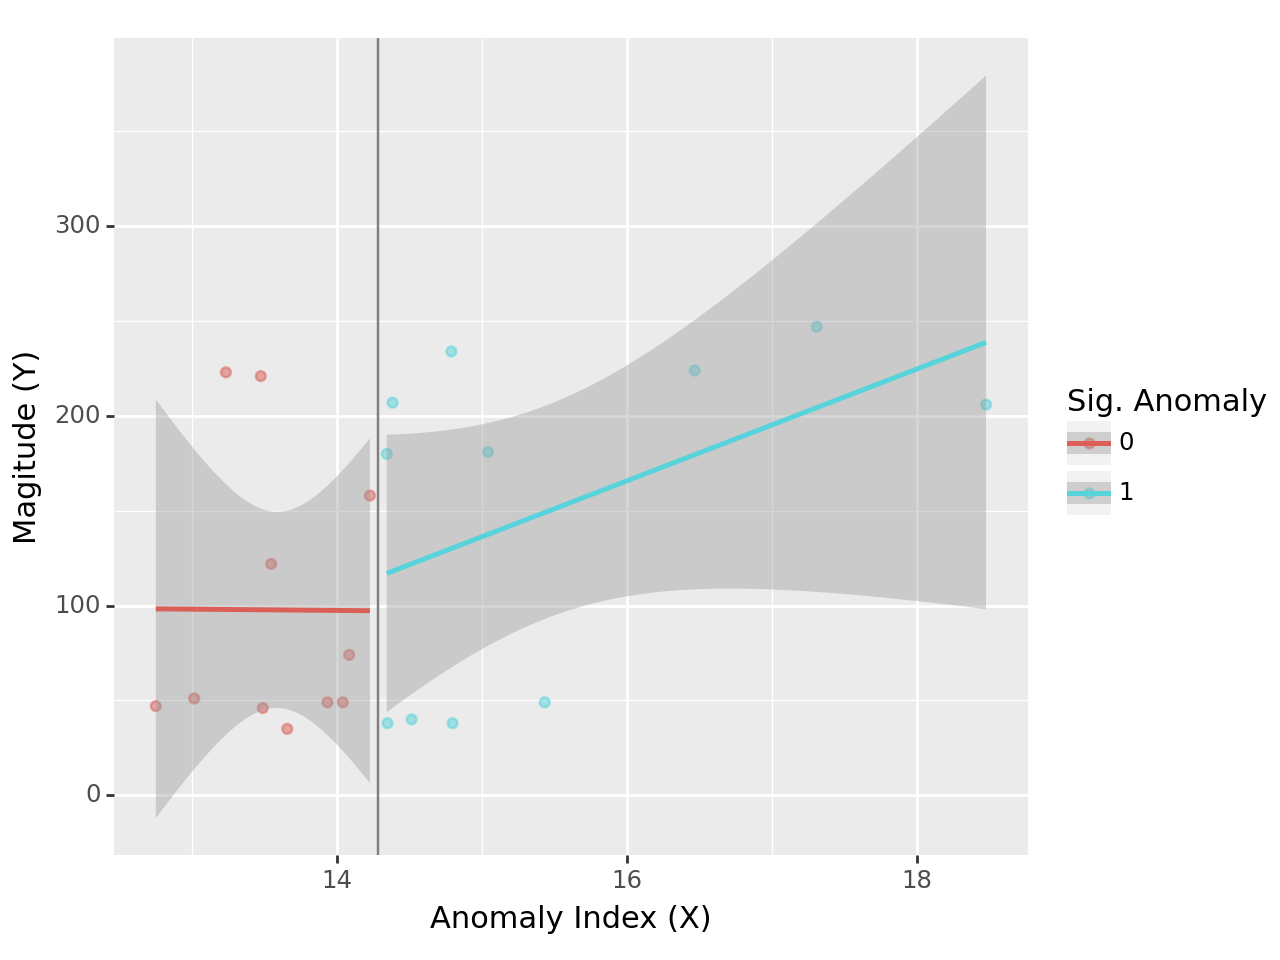

<Figure Size: (640 x 480)>

In [16]:
import plotnine as p
import statistics
import math
newX=[math.log2(i) for i in removeMon(x,4)]
dat=pd.DataFrame({'x':newX,'y1':removeMon(y,4)})
dat['D']=0
dat.loc[dat['x']>statistics.median(newX),'D']=1
print('"Counterfactual Potential Outcomes after Treatment')
p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +\
    p.geom_point(alpha = 0.5) +\
    p.geom_vline(xintercept = statistics.median(newX), colour = "grey") +\
    p.stat_smooth(method = "lm", se = 'F') +\
    p.labs(x = "Anomaly Index (X)", y = "Magitude (Y)", color="Sig. Anomaly")

Linear Regression for D=0 Group:
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                 0.0001635
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.990
Time:                        15:28:27   Log-Likelihood:                -62.122
No. Observations:                  11   AIC:                             128.2
Df Residuals:                       9   BIC:                             129.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.69

C:\Users\KelM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
C:\Users\KelM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
C:\Users\KelM\AppData\Local\Temp\ipykernel_45256\3439675344.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
C:\Users\KelM\AppData\Local\Temp\ipykernel_45256\3439675344.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consis

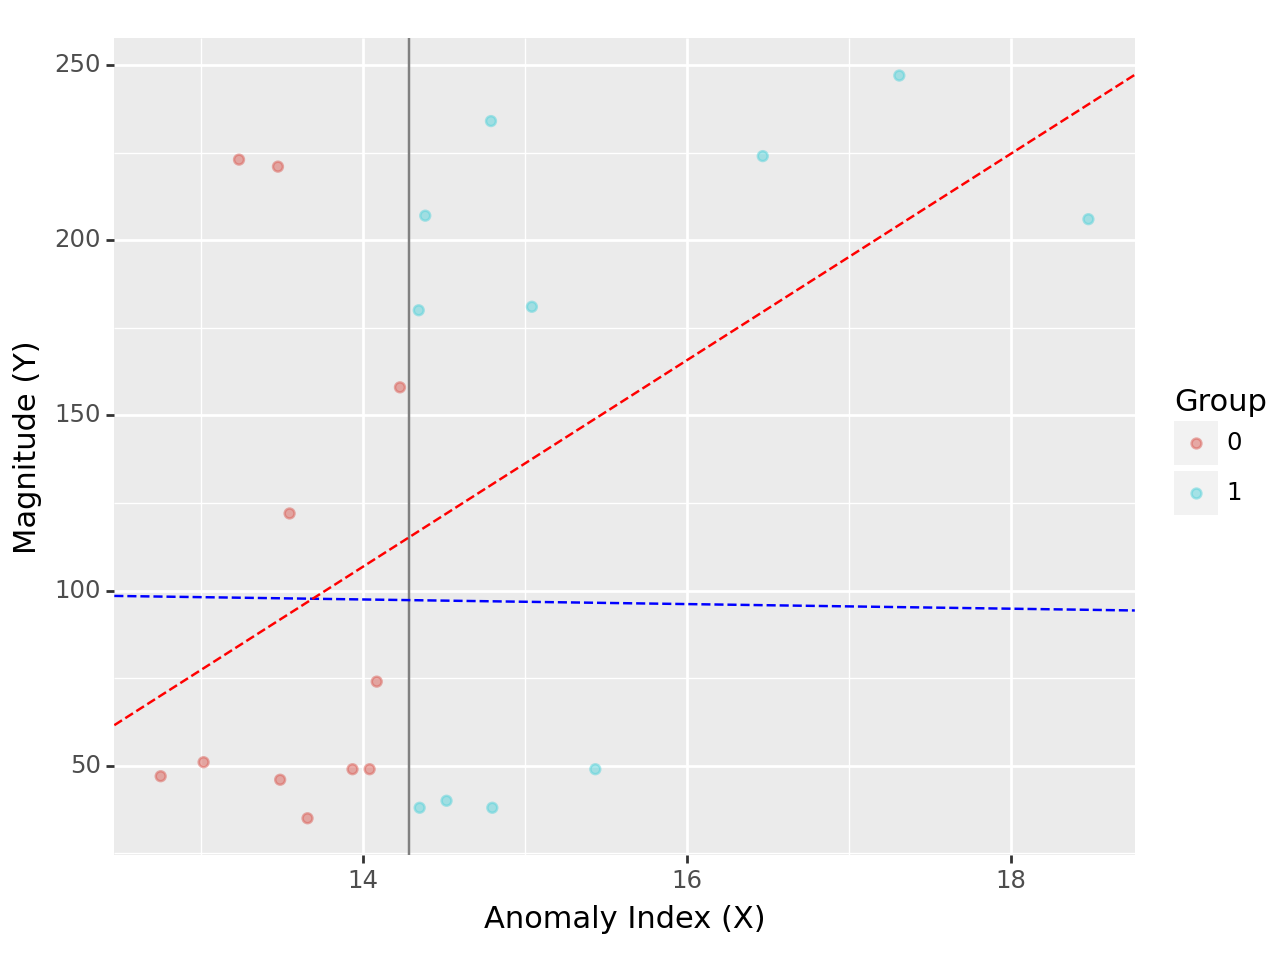

In [12]:
import pandas as pd
import statsmodels.api as sm
import statistics
import math
import plotnine as p

# Assuming 'removeMon' is a function you've defined to manipulate your data, and 'x' and 'y' are your original data
newX = [math.log2(i) for i in removeMon(x, 4)]
dat = pd.DataFrame({'x': newX, 'y1': removeMon(y, 4)})
dat['D'] = (dat['x'] > statistics.median(newX)).astype(int)

# Split data into two groups based on 'D'
dat_0 = dat[dat['D'] == 0]
dat_1 = dat[dat['D'] == 1]

# Perform separate linear regressions for each group
model_0 = sm.OLS(dat_0['y1'], sm.add_constant(dat_0['x'])).fit()
model_1 = sm.OLS(dat_1['y1'], sm.add_constant(dat_1['x'])).fit()

# Print the summaries
print("Linear Regression for D=0 Group:")
print(model_0.summary())
print("\nLinear Regression for D=1 Group:")
print(model_1.summary())

# Visualization with plotnine
(p.ggplot(dat, p.aes(x='x', y='y1', color='factor(D)')) +
    p.geom_point(alpha=0.5) +
    p.geom_vline(xintercept=statistics.median(newX), colour="grey") +
    p.geom_abline(intercept=model_0.params[0], slope=model_0.params[1], color='blue', linetype="dashed") +
    p.geom_abline(intercept=model_1.params[0], slope=model_1.params[1], color='red', linetype="dashed") +
    p.labs(x="Anomaly Index (X)", y="Magnitude (Y)", color="Group")).draw()


In [13]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2.454
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.152
Time:                        15:29:36   Log-Likelihood:                -63.018
No. Observations:                  11   AIC:                             130.0
Df Residuals:                       9   BIC:                             130.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -306.0211    291.809     -1.049      0.3

C:\Users\KelM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
